# 0176CD221037

# Data Preprocessing

# importing libraries

In [1]:
import numpy as np
import pandas as pd

# set data display limit

In [2]:
pd.set_option('display.max_rows' , 60)
pd.set_option('display.max_columns' , 60)

# load data and preprocessed

In [3]:
dataset = pd.read_csv(r'Uttar Pradesh.csv')

In [4]:
drop = [ 'will_it_snow' , 'chance_of_snow' , 'vis_km' , 'vis_miles' , 'gust_mph'
        , 'gust_kph' , 'chance_of_rain' , 'state' , 'city']
dataset.drop(drop , axis = 'columns' , inplace = True)

In [5]:
dataset

,temp_c,condition,wind_kph,pressure_mb,humidity,feelslike_c,windchill_c,heatindex_c
0,24.5,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.7,1004.0,41.0,25.1,24.5,25.1
1,24.2,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.7,1004.0,41.0,24.9,24.2,24.9
2,23.8,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.7,1004.0,41.0,24.8,23.8,24.8
3,23.5,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.7,1004.0,42.0,24.6,23.5,24.6
4,23.2,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.3,1004.0,43.0,24.6,23.2,24.6
...,...,...,...,...,...,...,...,...
1147,26.0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",11.5,1010.0,57.0,27.2,26.0,27.2
1148,25.1,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",11.5,1010.0,59.0,26.3,25.1,26.3
1149,24.1,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",11.5,1011.0,60.0,25.5,24.1,25.5
1150,23.7,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",9.7,1011.0,61.0,25.3,23.7,25.3


In [6]:
cond = dataset['condition']
cond.dtype

dtype('O')

In [7]:
# to convert string dictionary to dictionary
type(eval(cond[0]))

dict

In [8]:
# this functions convert all the string dictionary values to dictionary value
# and only get the relevant value that we need
def string_to_dict(condition):
    new_cond = []
    for i in range(len(condition)):
        data = condition[i]
        data = eval(data)
        text = data['text']
        new_cond.append(text)
    return new_cond

In [9]:
new_cond = string_to_dict(cond)

In [10]:
dataset['condition'] = new_cond

In [11]:
dataset

,temp_c,condition,wind_kph,pressure_mb,humidity,feelslike_c,windchill_c,heatindex_c
0,24.5,Clear,4.7,1004.0,41.0,25.1,24.5,25.1
1,24.2,Clear,4.7,1004.0,41.0,24.9,24.2,24.9
2,23.8,Clear,4.7,1004.0,41.0,24.8,23.8,24.8
3,23.5,Clear,4.7,1004.0,42.0,24.6,23.5,24.6
4,23.2,Clear,4.3,1004.0,43.0,24.6,23.2,24.6
...,...,...,...,...,...,...,...,...
1147,26.0,Clear,11.5,1010.0,57.0,27.2,26.0,27.2
1148,25.1,Clear,11.5,1010.0,59.0,26.3,25.1,26.3
1149,24.1,Clear,11.5,1011.0,60.0,25.5,24.1,25.5
1150,23.7,Clear,9.7,1011.0,61.0,25.3,23.7,25.3


# data visulization

In [13]:
data_visualize = dataset.drop('condition' , axis= 'columns')

In [14]:
data_visualize

,temp_c,wind_kph,pressure_mb,humidity,feelslike_c,windchill_c,heatindex_c
0,24.5,4.7,1004.0,41.0,25.1,24.5,25.1
1,24.2,4.7,1004.0,41.0,24.9,24.2,24.9
2,23.8,4.7,1004.0,41.0,24.8,23.8,24.8
3,23.5,4.7,1004.0,42.0,24.6,23.5,24.6
4,23.2,4.3,1004.0,43.0,24.6,23.2,24.6
...,...,...,...,...,...,...,...
1147,26.0,11.5,1010.0,57.0,27.2,26.0,27.2
1148,25.1,11.5,1010.0,59.0,26.3,25.1,26.3
1149,24.1,11.5,1011.0,60.0,25.5,24.1,25.5
1150,23.7,9.7,1011.0,61.0,25.3,23.7,25.3


In [15]:
# to find correlation between different parameters
corr = data_visualize.corr()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

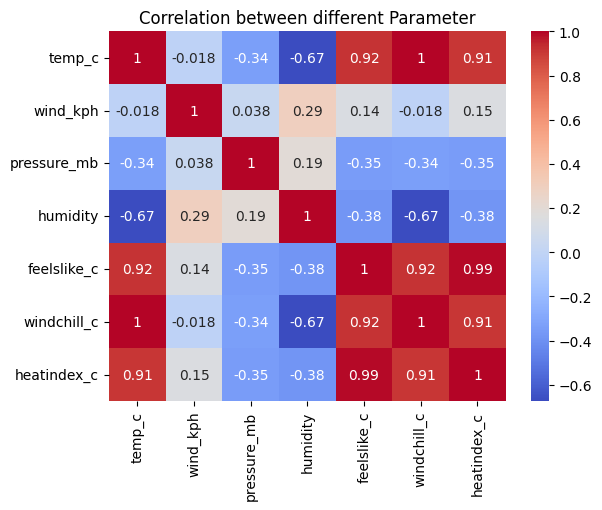

In [17]:
sns.heatmap(corr , annot=True ,cmap = 'coolwarm')
plt.title('Correlation between different Parameter')
# save this figure so that we can visualize it
plt.savefig('CorrelationHeatMap.jpg')
plt.show()

In [19]:
dataset.drop('windchill_c' , axis = 'columns' , inplace= True)

In [20]:
# we save our pre processed dataset for further use in machine learning algorithm deployment
dataset.to_csv('dataset.csv' , index = False)